# Tangadpalliwar, Abhilash - Homework 2

## UIN: 825009793

We numerically explore the relationship between error distributions, objective functions (least squares versus least absolute deviation, and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Yt$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Yn$, the errors have a standard normal distribution. We plot each of these data sets and the true regression function.

In [45]:
# Initializing X matrix

rm(list=ls())
set.seed(1234)
n <- 500
x <- seq(from=0,to=1,length.out=n)
X <- cbind(1,x,x^2)
beta <- matrix(c(1,2,4),nrow=3)

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot). Given the data, out goal is to infer the parameters $\beta$. We will consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} (y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta} |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed.

## Question 1

Fixing $X$, generate the $Yt$ and $Yn$ data $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). Compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Yt$ and $Yn$ and LAD for $Yt$ and $Yn$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient).

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each type of data, estimator. This will produce four scatterplots. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. Your scatterplot should look similar to the ones below.

**Tips for Fitting** For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in python the options are somewhat more limited:
* [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
* generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

The later is a more general method that will likely be slower. But scipy.optimize is general and will be useful for many other problems. You may also use any other optimizer you find. 

In [46]:
# Creating Y matrices for normal and t-distribution

Yt=matrix(,nrow=500,ncol=100)
Yn=matrix(,nrow=500,ncol=100)

N=100

for (i in 1:N) 
    {Yt[,i] <- X%*%beta + rt(n,df=2)
     Yn[,i] <- X%*%beta + rnorm(n)
    }

In [47]:
# Creating output matrices for storing Least Squares models' co-effecients

output.tdist.ls=matrix(,nrow=3,ncol=100)
output.norm.ls=matrix(,nrow=3,ncol=100)

In [48]:
#Least Squares estimates for normally distributed Y

for (i in 1:N)
    {model1=lm.fit(X,Yn[,i])
     output.norm.ls[,i]=model1$coefficients
     }
output.norm.ls=output.norm.ls[-1,]
output.norm.ls

1.041848,2.261006,1.590283,2.929542,1.495795,2.198842,1.729554,1.722652,2.124522,1.951365,...,3.054081,1.808778,1.835004,1.681578,1.824431,1.441117,2.383978,1.728558,1.666153,2.501480
4.937847,3.675706,4.574074,3.146503,4.397912,4.107873,4.114616,4.276174,3.747158,3.950136,...,2.981855,3.957672,4.306578,4.218495,4.142001,4.901088,3.651192,4.498422,4.195881,3.584995


In [49]:
#Least Squares estimates for t-distributed Y

for (i in 1:N)
    {model2=lm.fit(X,Yt[,i])
     output.tdist.ls[,i]=model2$coefficients
     }
output.tdist.ls=output.tdist.ls[-1,]
output.tdist.ls

1.429478,2.793093,0.865696,1.645431,-1.190960,0.8219021,1.795423,1.398424,0.4010152,4.5784988,...,3.039165,-0.612499,1.232164,4.75005,2.099493,1.602425,3.218409,2.620318,2.88716,1.014557
4.908305,2.465236,4.702245,4.011904,7.152541,5.0863323,3.948903,5.023896,5.9398561,0.5935827,...,3.951976,6.065665,4.364515,1.08183,3.206995,3.887144,2.591478,3.202033,3.20407,4.362286


In [13]:
install.packages('L1pack',repos = "http://cran.us.r-project.org")
library(L1pack)

Installing package into 'C:/Users/abhil/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'L1pack' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhil\AppData\Local\Temp\RtmpaciXCN\downloaded_packages


In [50]:
# Creating output matrices for storing LAD models' co-effecients

output.tdist.lad=matrix(,nrow=3,ncol=100)
output.norm.lad=matrix(,nrow=3,ncol=100)

In [51]:
#LAD estimates for normally distributed Y

for (i in 1:N)
    {model3=l1fit(X[,-1],Yn[,i])
     output.norm.lad[,i]=model3$coefficients
     }
output.norm.lad=output.norm.lad[-1,]
output.norm.lad

1.184128,2.112981,1.581694,3.362733,1.729299,1.876089,0.7438341,1.560867,2.264751,2.387233,...,2.848107,1.523551,1.764893,1.466702,1.585434,1.800327,2.221047,1.510229,2.377080,3.367978
4.716541,3.826161,4.630109,2.795545,4.236143,4.686106,4.8329720,4.143104,3.618114,3.417345,...,3.067234,4.103059,4.324073,4.365107,4.230564,4.497593,3.675118,4.801352,3.584168,2.592739


In [52]:
#LAD estimates for t-distributed Y

for (i in 1:N)
    {model4=l1fit(X[,-1],Yt[,i])
     output.tdist.lad[,i]=model4$coefficients
     }
output.tdist.lad=output.tdist.lad[-1,]
output.tdist.lad

0.7141812,1.329642,1.029709,1.444682,0.9020346,1.279075,2.237942,0.4915196,1.479725,2.941448,...,2.787849,0.1914572,1.598888,2.105967,0.5812809,1.930582,3.830879,2.356669,1.792396,0.7805264
5.1952181,4.712879,4.536510,4.749768,5.4633331,4.878817,3.642538,5.4204407,4.699656,2.745446,...,3.461375,5.8963914,4.661741,3.490656,4.9884171,3.364551,2.410777,3.495471,4.171587,5.1232772


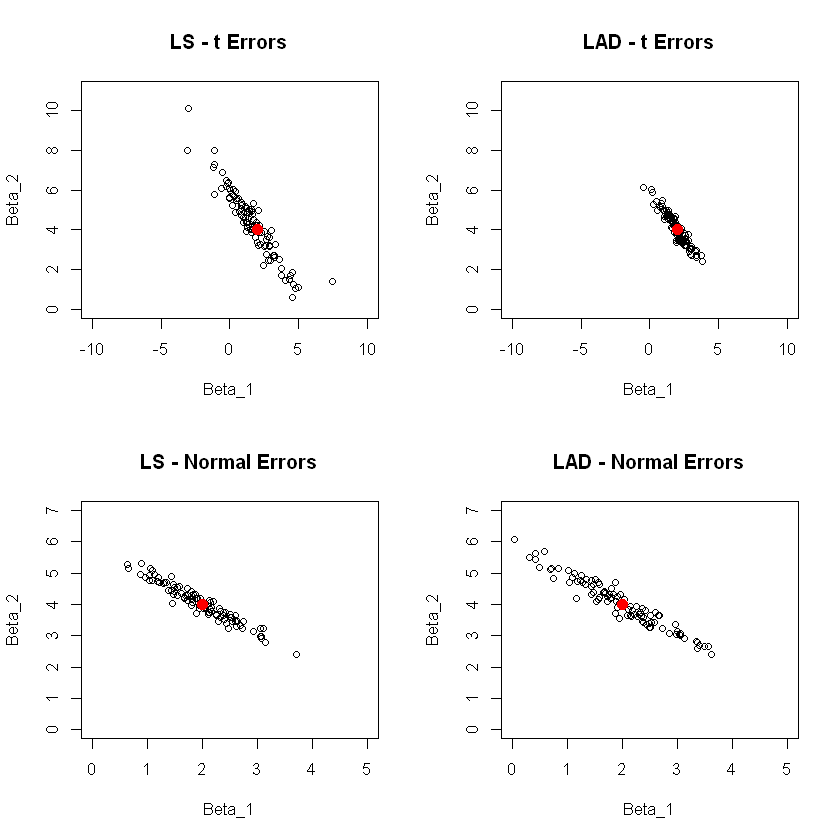

In [53]:
# Plotting the coeffecients obtained from the 4 models above against the true co-effecients 

par(mfrow=c(2,2))

# For t-distributed Y
ylim <- c(0,11)
xlim <- c(-10,10)

plot(output.tdist.ls[1,],output.tdist.ls[2,],xlab="Beta_1",ylab="Beta_2",main="LS - t Errors",xlim=xlim,ylim=ylim)
points(2,4, col="red1", pch=19, cex=1.5)
plot(output.tdist.lad[1,],output.tdist.lad[2,],xlab="Beta_1",ylab="Beta_2",main="LAD - t Errors",xlim=xlim,ylim=ylim)
points(2,4, col="red1", pch=19, cex=1.5)

# For normally distributed Y

ylim <- c(0,7)
xlim <- c(0,5)

plot(output.norm.ls[1,],output.norm.ls[2,],xlab="Beta_1",ylab="Beta_2",main="LS - Normal Errors",xlim=xlim,ylim=ylim)
points(2,4, col="red1", pch=19, cex=1.5)
plot(output.norm.lad[1,],output.norm.lad[2,],xlab="Beta_1",ylab="Beta_2",main="LAD - Normal Errors",xlim=xlim,ylim=ylim)
points(2, 4, col="red1", pch=19, cex=1.5)

## Conclusion

As it is evident from the graphs above, we can comment that for t-distributed errors, LAD model seems to be of better quality than LS model as the values of the co-effecients are closer to the true co-effecients.

In case of normally distributed errors, least squares model appears to be of a better quality than LAD model as the values of the co-effecients are closer to the true co-effecients, though the quality of the fit is not as good as LAD model for t-distributed errors.

## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as benchmark in R or some of the tools [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) in python. Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$).

In [24]:
install.packages('rbenchmark',repos = "http://cran.us.r-project.org")
library(rbenchmark)

Installing package into 'C:/Users/abhil/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'rbenchmark' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhil\AppData\Local\Temp\RtmpaciXCN\downloaded_packages


In [54]:
# running replications for determining computational complexities 

times =  benchmark( "LS using lm.fit" = {
            for (i in 1:N)
                lm.fit(X,Yn[,i])
     
            },
           
           "LAD using l1fit" = {
            for (i in 1:N)
                l1fit(X[,-1],Yt[,i])
            },replications=c(5,10,20,40,80,160,320,640,1280,2560), columns=c('test', 'elapsed', 'replications'), order='test')

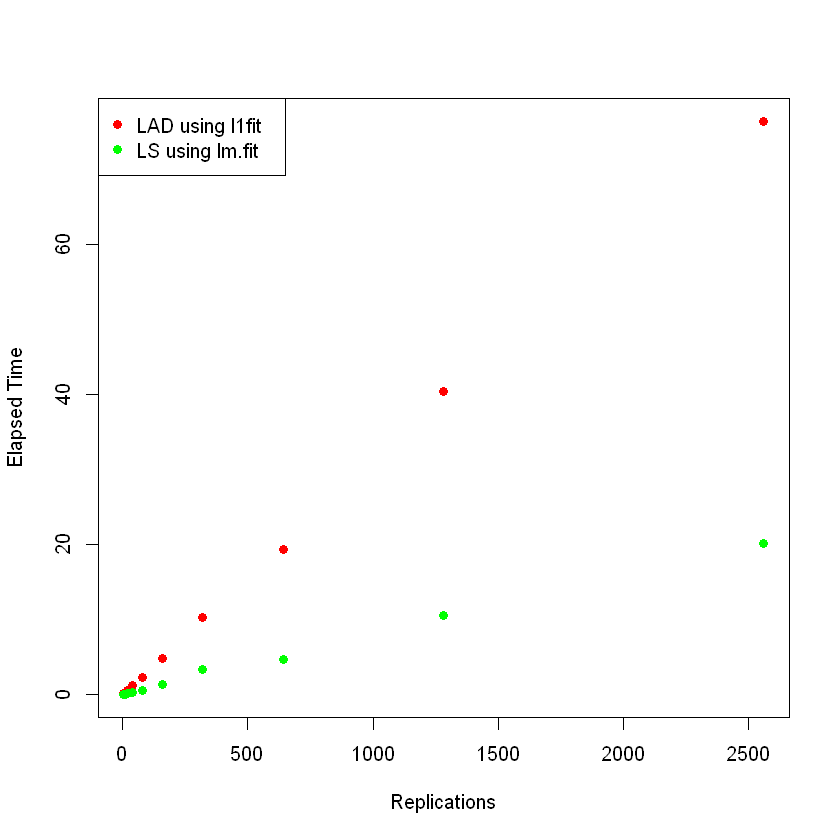

In [57]:
plot(replications,elapsed,type="p",col=c("red","green")[test], pch=19, 
     xlab = "Replications", ylab = "Elapsed Time");
legend(x="topleft", legend = levels(test), col=c("red","green"), pch=19);

In [58]:
# displaying the experimental results

times

,test,elapsed,replications
2,LAD using l1fit,0.15,5
4,LAD using l1fit,0.29,10
6,LAD using l1fit,0.61,20
8,LAD using l1fit,1.11,40
10,LAD using l1fit,2.24,80
12,LAD using l1fit,4.55,160
14,LAD using l1fit,9.11,320
16,LAD using l1fit,17.99,640
18,LAD using l1fit,35.67,1280
20,LAD using l1fit,71.60,2560


## Empirical determination of computational complexity

According to the experimental results and the graph above, the computational complexities of both LS and LAD estimates
of beta seem to be of order (n) as both of the graphs follow a linear trend with the number of replications. 

However, LAD estimates take more time to compute (approximately 3-4 times) as compared to LS estimates, implying that the constant associated with LAD is thrice or four times that of LS.